<a href="https://colab.research.google.com/github/AdreyO/PIS_practice/blob/main/PIS_VSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Widgets

In [1]:
import ipywidgets as wd

In [2]:
from IPython.display import  display

In [3]:
sl1 = wd.IntSlider()

In [4]:
sl1

IntSlider(value=0)

In [98]:
name = wd.Text(value='Cheburek')

In [99]:
display(name)

Text(value='Cheburek')

In [7]:
import time

In [8]:
pb1 = wd.IntProgress(value=0,
                          min=1,
                          max=100,
                          description='Loading: ',
                          bar_style='',
                          orientation='horizontal')
display(pb1)

for i in range(100):
    pb1.value = i+1
    time.sleep(0.2)

IntProgress(value=1, description='Loading: ', min=1)

# Import packages

In [19]:
import pandas as pd
import numpy as np
from IPython.display import display

# Import data

In [20]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data",
                   header = None)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [21]:
names = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Class"]
data.columns = names
data = data.drop(columns=['Id'])
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [22]:
data['Class'].replace({1:"building_float", 
                       2:"building_non_float", 
                       3:"vehicle_float",
                       4:"vehicle_non_float",
                       5:"containers",
                       6:"tableware",
                       7:"headlamps"}, inplace=True)
data['Class'].value_counts()

building_non_float    76
building_float        70
headlamps             29
vehicle_float         17
containers            13
tableware              9
Name: Class, dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [24]:
 for col in data.columns:
      fr = np.random.randint(5,10)/100
      data.loc[data.sample(frac=fr).index, col] = np.nan

# Data visualization

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      199 non-null    float64
 1   Na      203 non-null    float64
 2   Mg      203 non-null    float64
 3   Al      199 non-null    float64
 4   Si      195 non-null    float64
 5   K       195 non-null    float64
 6   Ca      199 non-null    float64
 7   Ba      197 non-null    float64
 8   Fe      201 non-null    float64
 9   Class   203 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [26]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,199.000000,203.000000,203.000000,199.000000,195.000000,195.000000,199.000000,197.000000,201.000000
mean,1.518431,13.403498,2.700197,1.451809,72.645436,0.504308,8.986734,0.168883,0.057811
std,0.003028,0.830795,1.426352,0.507182,0.794239,0.677754,1.454024,0.497012,0.098205
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516550,12.895000,2.195000,1.190000,72.270000,0.125000,8.270000,0.000000,0.000000
50%,1.517680,13.290000,3.480000,1.380000,72.790000,0.550000,8.600000,0.000000,0.000000
75%,1.519155,13.850000,3.600000,1.630000,73.095000,0.610000,9.165000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [27]:
print('_______________________')
display(data['Class'].describe())
print('_______________________')
display(data['Class'].value_counts())

_______________________


count                    203
unique                     6
top       building_non_float
freq                      70
Name: Class, dtype: object

_______________________


building_non_float    70
building_float        69
headlamps             27
vehicle_float         16
containers            12
tableware              9
Name: Class, dtype: int64

In [32]:
data['Al'].isna().sum()

15

In [33]:
for col in data.columns:
  missing_values_counts = data[col].isna().sum()
  percentage = 100*missing_values_counts/len(data[col])
  print("Column", col, "contains", missing_values_counts, "NULL values(", percentage, "% ).")

Column RI contains 15 NULL values( 7.009345794392523 % ).
Column Na contains 11 NULL values( 5.140186915887851 % ).
Column Mg contains 11 NULL values( 5.140186915887851 % ).
Column Al contains 15 NULL values( 7.009345794392523 % ).
Column Si contains 19 NULL values( 8.878504672897197 % ).
Column K contains 19 NULL values( 8.878504672897197 % ).
Column Ca contains 15 NULL values( 7.009345794392523 % ).
Column Ba contains 17 NULL values( 7.94392523364486 % ).
Column Fe contains 13 NULL values( 6.074766355140187 % ).
Column Class contains 11 NULL values( 5.140186915887851 % ).


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms

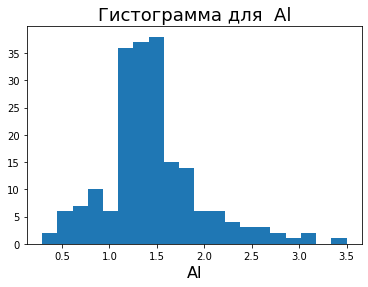

In [95]:
col='Al'
fig, ax = plt.subplots()
ax.hist(data[col], bins=20)
ax.set_xlabel(col, fontsize=16)
ax.set_title("Гистограмма для  " + str(col), fontsize=18)
plt.show()

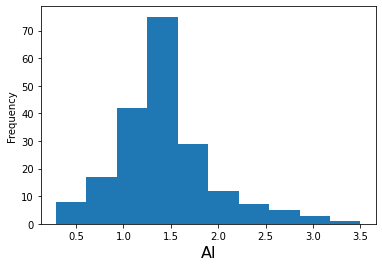

In [96]:
ax = data[col].plot(kind='hist')
ax.set_xlabel(col, fontsize=16)
plt.show()

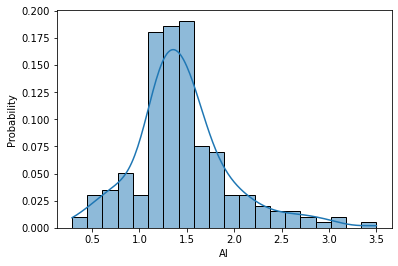

In [97]:
sns.histplot(data=data, x=col, kde=True, stat='probability', bins=20)
plt.show()

# Bar

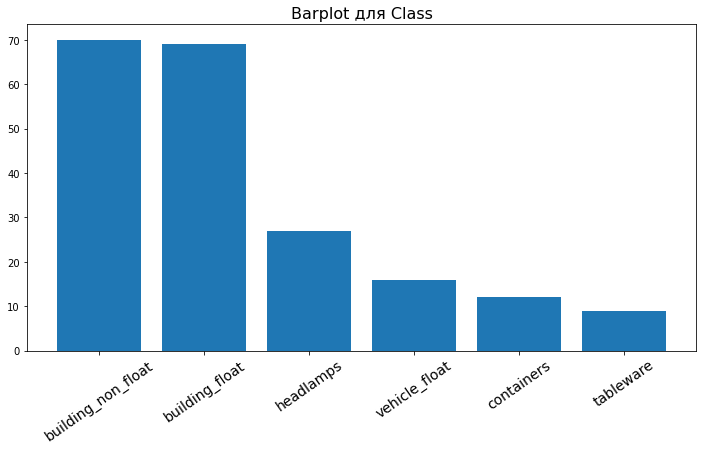

In [38]:
col='Class'

fig, ax = plt.subplots(figsize=(12,6))

ax.bar(data[col].value_counts().index.values, 
       data[col].value_counts().values)

ax.set_xlabel(None, fontsize=16)
ax.set_title('Barplot для '+str(col), fontsize=16)
ax.tick_params(axis='x', which='major', 
               labelsize=14, rotation=35)

plt.show()

# Boxplot

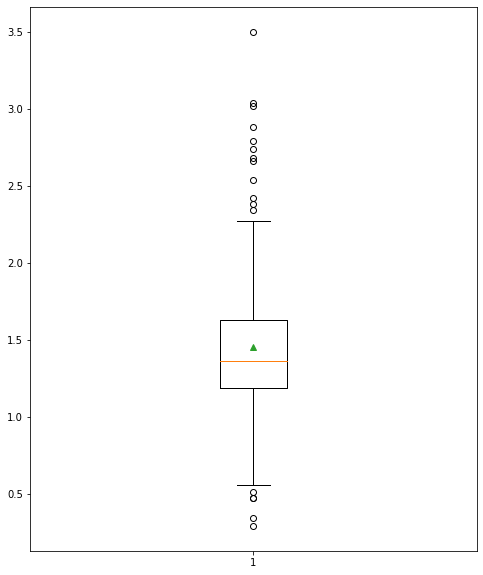

In [ ]:
# np.isnan(data['Al'])
# data['Al'][~np.isnan(data['Al'])]

fig3, ax3 = plt.subplots(figsize = (8, 10))

ax3.boxplot(data['Al'][~np.isnan(data['Al'])], showmeans=True)

plt.show()


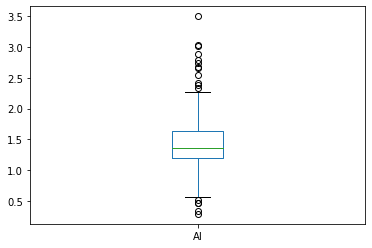

In [ ]:
data[col].plot(kind = 'box')
plt.show()

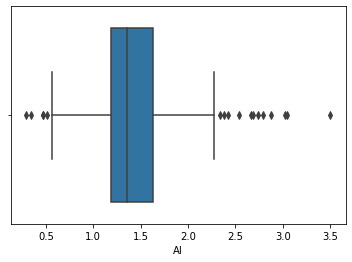

In [ ]:
sns.boxplot(data=data, x=col)
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


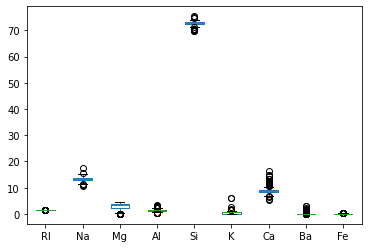

In [ ]:
data.plot(kind='box')
plt.show()


# Scaler

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


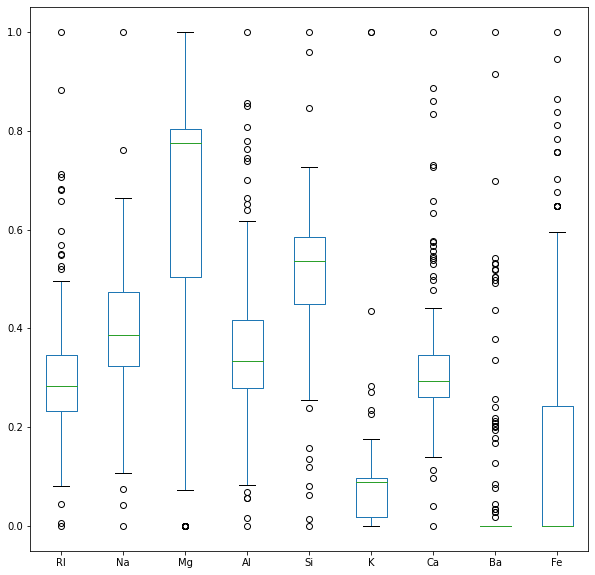

In [ ]:
scaler = prepro.MinMaxScaler()
dataScaled = scaler.fit_transform(data[data.columns.values[data.columns.values != 'Class']])

dataScaled = pd.DataFrame(dataScaled, 
                          columns = data.columns.values[data.columns.values != 'Class'])
dataScaled.plot(kind = 'box', figsize = (10, 10))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


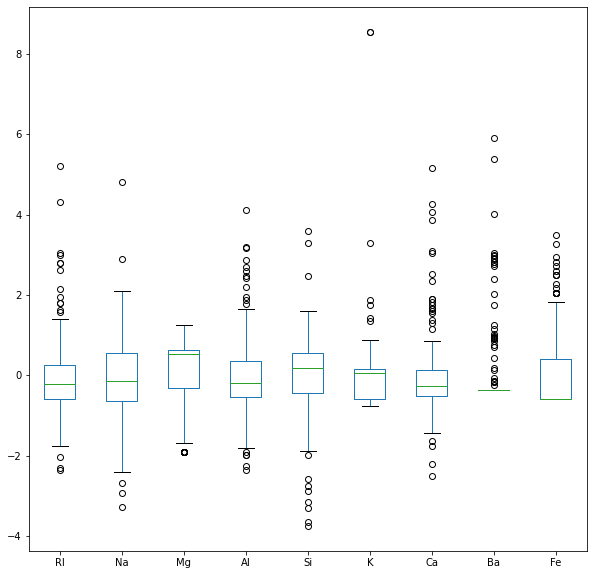

In [ ]:
scaler_standart = prepro.StandardScaler()

DataScaled_standart = scaler_standart.fit_transform(data[data.columns.values[data.columns.values != 'Class']])
DataScaled_standart = pd.DataFrame(DataScaled_standart, columns = data.columns.values[data.columns.values != 'Class'])

DataScaled_standart.plot(kind = 'box', figsize = (10, 10))

# Pairplot

In [50]:
col1 = 'Mg'
col2 = 'Fe'

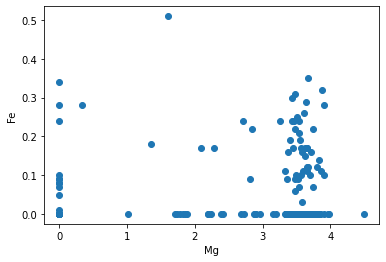

In [51]:
fig, ax = plt.subplots()
 
ax.scatter(data[col1], data[col2])
ax.set_xlabel(col1)
ax.set_ylabel(col2)
 
plt.show()

# NaN

In [52]:
data.mean()

RI     1.518431
Na    13.403498
Mg     2.700197
Al     1.451809
Si    72.645436
K      0.504308
Ca     8.986734
Ba     0.168883
Fe     0.057811
dtype: float64

In [53]:
data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   203 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [54]:
data['Class'].value_counts()

building_non_float    70
building_float        69
headlamps             27
vehicle_float         16
containers            12
tableware              9
Name: Class, dtype: int64

In [55]:
data['Class'].value_counts().index.values[0]

'building_non_float'

In [56]:
data['Class'].mode()

0    building_non_float
dtype: object

In [57]:
data_fillna_mean['Class'].fillna(data['Class'].value_counts().index.values[0], inplace = True)
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


# PCA

In [58]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA()
pca.fit(data_fillna_mean[data_fillna_mean.columns.values [data_fillna_mean.columns.values  != 'Class']] )

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [60]:
print(pca.explained_variance_ratio_*100)

[4.71719928e+01 2.54857297e+01 1.07963117e+01 1.04696235e+01
 3.50949768e+00 1.80471595e+00 6.23873481e-01 1.38228626e-01
 2.64912710e-05]


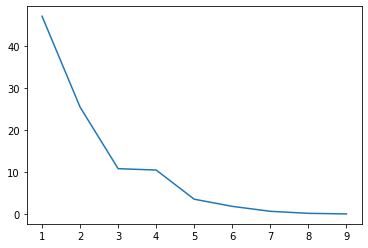

In [61]:
_, ax = plt.subplots()
ax.plot(np.arange(1,10), pca.explained_variance_ratio_*100)
plt.show()

In [62]:
pcaData=pd.DataFrame(
    pca.transform(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values != 'Class']]))
pcaNames=[]
for i in range(9):
  pcaNames.append('pc'+str(i+1))
pcaData.columns=pcaNames
pcaData.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,-1.392145,-1.119503,-0.572600,0.933787,0.125177,-0.073609,-0.025104,-0.067054,-0.001333
1,-1.452424,0.339908,-0.375186,0.130390,-0.158136,-0.116921,0.028708,-0.040345,-0.001116
2,-1.451096,0.307485,-0.243006,-0.264014,0.030670,-0.177581,-0.038333,-0.053691,-0.000309
3,-1.257360,-0.267851,0.049066,-0.030279,-0.006496,0.028853,-0.085968,-0.066041,-0.000216
4,-0.673533,-0.600967,-0.217234,-0.390836,-0.133439,0.038995,0.306733,-0.035623,0.000720


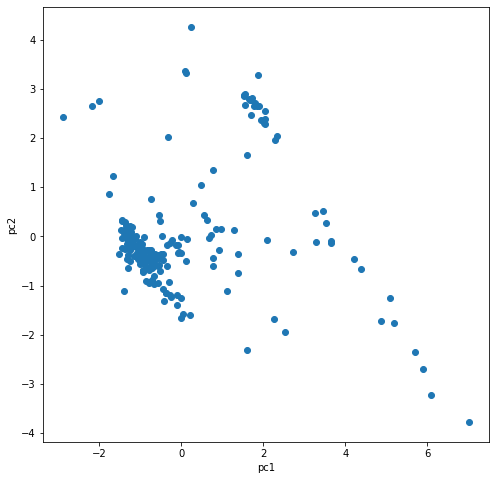

In [63]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(pcaData['pc1'], pcaData['pc2'])
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')

plt.show()

In [64]:
pcaData['Class'] = data_fillna_mean['Class'].copy()

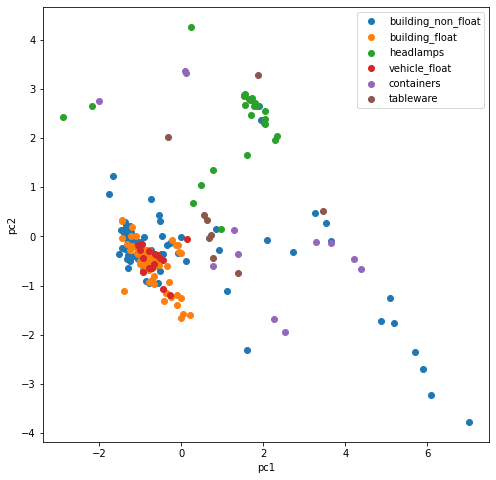

In [65]:
col1 = 'pc1'
col2 = 'pc2'

fig, ax = plt.subplots(figsize=(8,8))

for glassType in pcaData['Class'].value_counts().index.values:
  ax.scatter(pcaData[col1][ pcaData['Class']==glassType ],
             pcaData[col2][ pcaData['Class']==glassType ],
             label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()

plt.show()

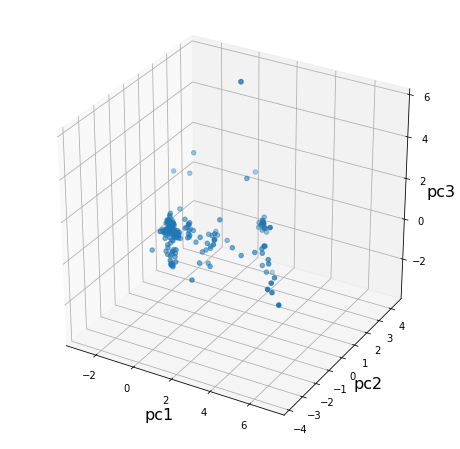

In [66]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.scatter(pcaData['pc1'], pcaData['pc2'], pcaData['pc3'])
ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('pc2', fontsize=16)
ax.set_zlabel('pc3', fontsize=16)

plt.show()

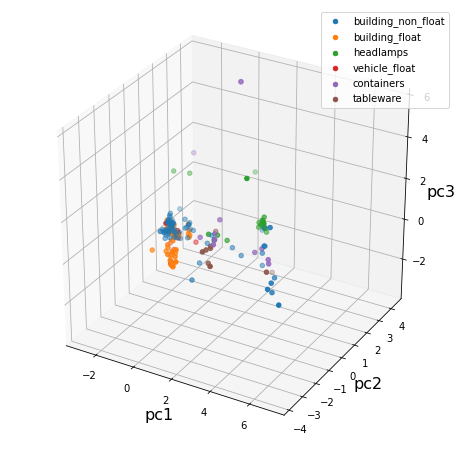

In [67]:
col1 = 'pc1'
col2 = 'pc2'

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for glassType in pcaData['Class'].value_counts().index.values:
  ax.scatter(pcaData['pc1'][ pcaData['Class']==glassType ], 
             pcaData['pc2'][ pcaData['Class']==glassType ], 
             pcaData['pc3'][ pcaData['Class']==glassType ],
             label=glassType)

ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('pc2', fontsize=16)
ax.set_zlabel('pc3', fontsize=16)
ax.legend()

plt.show()

# корреляция

In [68]:
corr = data_fillna_mean.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.163810,-0.176798,-0.361427,-0.511182,-0.211979,0.778975,0.022753,0.134397
Na,-0.163810,1.000000,-0.258848,0.133335,-0.040741,-0.245384,-0.253335,0.283124,-0.223907
Mg,-0.176798,-0.258848,1.000000,-0.453097,-0.123579,-0.022781,-0.442497,-0.452676,0.049269
Al,-0.361427,0.133335,-0.453097,1.000000,-0.021887,0.329316,-0.237905,0.428647,-0.018068
Si,-0.511182,-0.040741,-0.123579,-0.021887,1.000000,-0.199689,-0.187916,-0.131969,-0.093811
K,-0.211979,-0.245384,-0.022781,0.329316,-0.199689,1.000000,-0.314757,-0.022045,-0.004226
Ca,0.778975,-0.253335,-0.442497,-0.237905,-0.187916,-0.314757,1.000000,-0.105854,0.101244
Ba,0.022753,0.283124,-0.452676,0.428647,-0.131969,-0.022045,-0.105854,1.000000,-0.042625
Fe,0.134397,-0.223907,0.049269,-0.018068,-0.093811,-0.004226,0.101244,-0.042625,1.000000


<function matplotlib.pyplot.show>

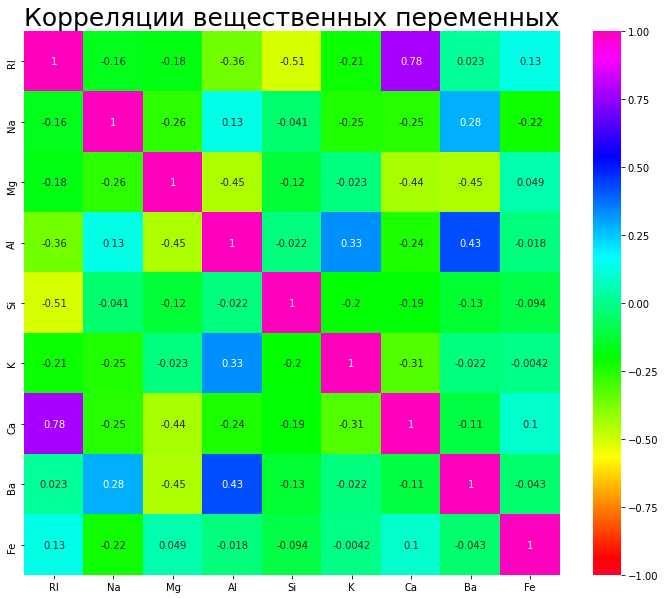

In [69]:
plt.figure(figsize=(12,10 ))
ax = sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap='gist_rainbow')
ax.set_title('Корреляции вещественных переменных', fontsize=25)
plt.show

<function matplotlib.pyplot.show>

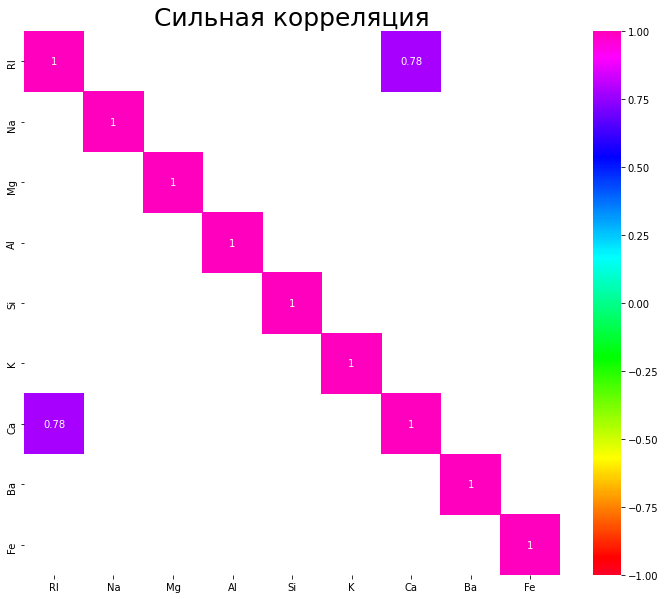

In [70]:
plt.figure (figsize=(12,10))
ax = sns.heatmap (corr[(corr >= 0.75)|(corr <=-0.75)], annot=True, vmax=1, vmin=-1, cmap='gist_rainbow')
ax.set_title('Сильная корреляция', fontsize=25)
plt.show

# Feature importance

In [71]:
import sklearn.preprocessing as prepro
from sklearn.ensemble import ExtraTreesClassifier

In [72]:
forest = ExtraTreesClassifier(n_estimators=100)

In [73]:
#  forest.fit(x,y)
forest.fit(
    data_fillna_mean[ data_fillna_mean.columns.values[data_fillna_mean.columns.values!='Class'] ], 
    data_fillna_mean['Class']
    )

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [74]:
importance = forest.feature_importances_
importance

array([0.13404058, 0.09815821, 0.170374  , 0.13624213, 0.08765076,
       0.10902091, 0.12573796, 0.08258481, 0.05619064])

In [75]:
np.sort(importance)[:: -1]

array([0.170374  , 0.13624213, 0.13404058, 0.12573796, 0.10902091,
       0.09815821, 0.08765076, 0.08258481, 0.05619064])

In [76]:
indices = np.argsort(importance)[::-1]
indices

array([2, 3, 0, 6, 5, 1, 4, 7, 8])

In [77]:
# Print the feature ranking
print("Feature ranking:")

for f in range(9):
    print("%d. feature %s (%f)" % (f + 1, data_fillna_mean.columns.values[indices[f]], importance[indices[f]]))

Feature ranking:
1. feature Mg (0.170374)
2. feature Al (0.136242)
3. feature RI (0.134041)
4. feature Ca (0.125738)
5. feature K (0.109021)
6. feature Na (0.098158)
7. feature Si (0.087651)
8. feature Ba (0.082585)
9. feature Fe (0.056191)


In [78]:
std = np.std( [tree.feature_importances_ for tree in forest.estimators_], axis=0)
std

array([0.04150805, 0.03508272, 0.04579317, 0.04615232, 0.02682256,
       0.03389618, 0.03843052, 0.03552401, 0.02046479])

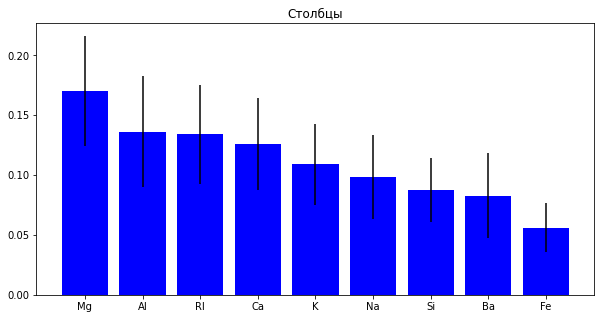

In [79]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_title('Столбцы')
ax.bar(data_fillna_mean.columns.values[indices], importance[indices], color="b", yerr=std[indices], align="center")

plt.show()

# №1

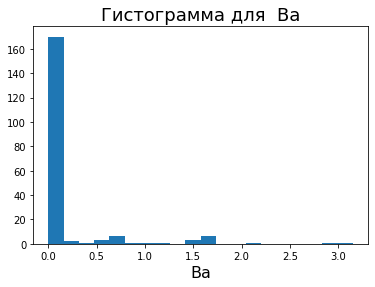

In [80]:
#@title Выбор переменной
#@markdown ---
Variable = "Ba" #@param ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Class"]
#@markdown ---
if  Variable == 'Class':
    col = Variable
    fig, ax = plt.subplots(figsize=(12,6))
    ax.bar(data[col].value_counts().index.values, 
        data[col].value_counts().values)
    ax.set_xlabel(None, fontsize=16)
    ax.set_title('Barplot для '+str(col), fontsize=16)
    ax.tick_params(axis='x', which='major', labelsize=14, rotation=35)
    plt.show()
else:
    col = Variable
    fig, ax = plt.subplots()
    ax.hist(data[col], bins=20)
    ax.set_xlabel(col, fontsize=16)
    ax.set_title("Гистограмма для  " + str(col), fontsize=18)
    plt.show()

# ДЗ


In [83]:
from sklearn.decomposition import PCA

In [84]:
pca = PCA()
pca.fit( data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values != 'Class']] )

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [85]:
print(pca.explained_variance_ratio_*100)

[4.71719928e+01 2.54857297e+01 1.07963117e+01 1.04696235e+01
 3.50949768e+00 1.80471595e+00 6.23873481e-01 1.38228626e-01
 2.64912710e-05]


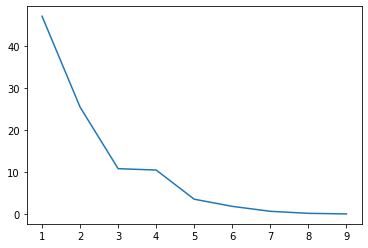

In [86]:
_, ax = plt.subplots()
ax.plot(np.arange(1,10),pca.explained_variance_ratio_*100)
plt.show()

In [87]:
pcaData['Class'] = data_fillna_mean['Class'].copy()

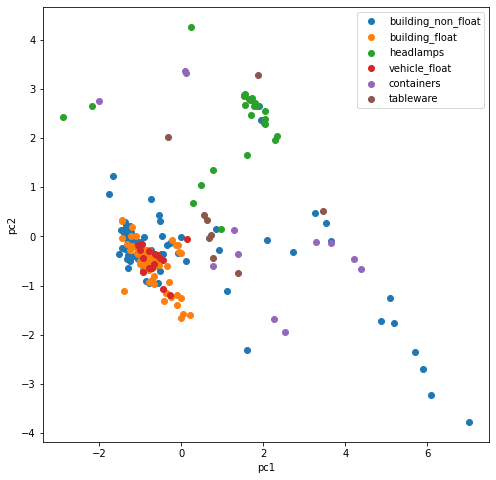

In [88]:
col1 = 'pc1'
col2 = 'pc2'

fig, ax = plt.subplots(figsize=(8,8))

for glassType in pcaData['Class'].value_counts().index.values:
  ax.scatter(pcaData[col1][ pcaData['Class']==glassType ],
             pcaData[col2][ pcaData['Class']==glassType ],
             label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()

plt.show()

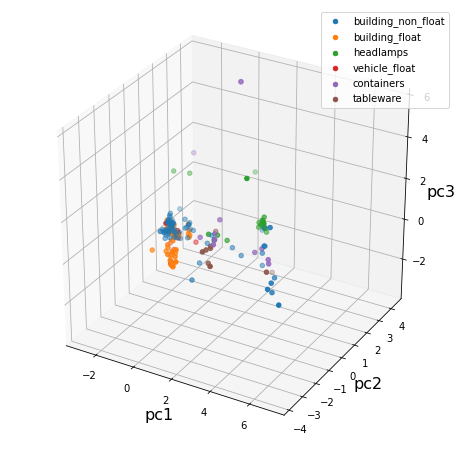

In [89]:
col1 = 'pc1'
col2 = 'pc2'

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for glassType in pcaData['Class'].value_counts().index.values:
  ax.scatter(pcaData['pc1'][ pcaData['Class']==glassType ], 
             pcaData['pc2'][ pcaData['Class']==glassType ], 
             pcaData['pc3'][ pcaData['Class']==glassType ],
             label=glassType)

ax.set_xlabel('pc1', fontsize=16)
ax.set_ylabel('pc2', fontsize=16)
ax.set_zlabel('pc3', fontsize=16)
ax.legend()

plt.show()

In [90]:
corr = data_fillna_mean.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.163810,-0.176798,-0.361427,-0.511182,-0.211979,0.778975,0.022753,0.134397
Na,-0.163810,1.000000,-0.258848,0.133335,-0.040741,-0.245384,-0.253335,0.283124,-0.223907
Mg,-0.176798,-0.258848,1.000000,-0.453097,-0.123579,-0.022781,-0.442497,-0.452676,0.049269
Al,-0.361427,0.133335,-0.453097,1.000000,-0.021887,0.329316,-0.237905,0.428647,-0.018068
Si,-0.511182,-0.040741,-0.123579,-0.021887,1.000000,-0.199689,-0.187916,-0.131969,-0.093811
K,-0.211979,-0.245384,-0.022781,0.329316,-0.199689,1.000000,-0.314757,-0.022045,-0.004226
Ca,0.778975,-0.253335,-0.442497,-0.237905,-0.187916,-0.314757,1.000000,-0.105854,0.101244
Ba,0.022753,0.283124,-0.452676,0.428647,-0.131969,-0.022045,-0.105854,1.000000,-0.042625
Fe,0.134397,-0.223907,0.049269,-0.018068,-0.093811,-0.004226,0.101244,-0.042625,1.000000


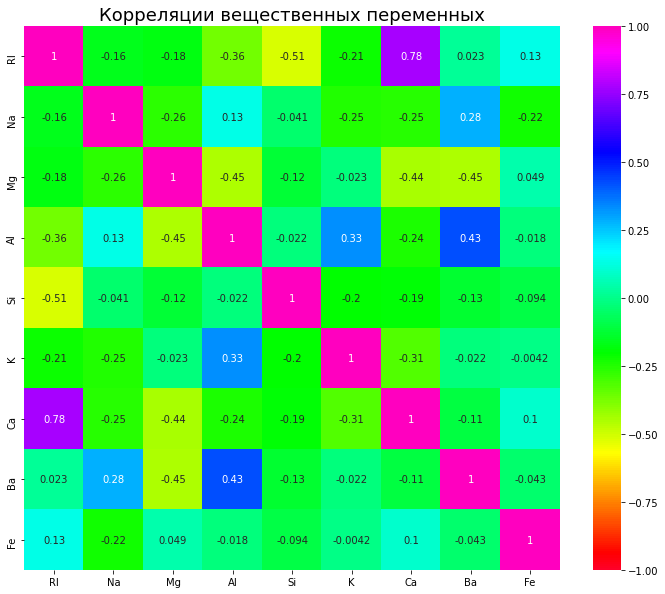

In [91]:
plt.figure(figsize=(12, 10))

ax = sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap='gist_rainbow')

ax.set_title('Корреляции вещественных переменных', fontsize=18)

plt.show()

<function matplotlib.pyplot.show>

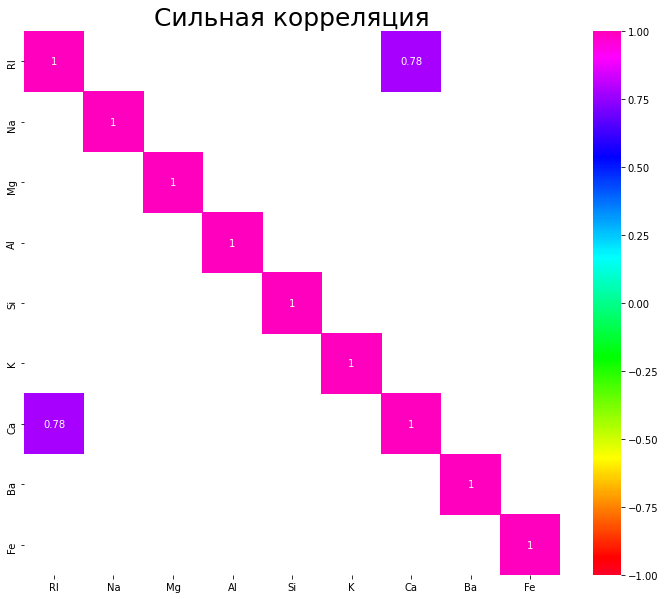

In [92]:
plt.figure (figsize=(12,10))
ax = sns.heatmap (corr[(corr >= 0.75)|(corr <=-0.75)], annot=True, vmax=1, vmin=-1, cmap='gist_rainbow')
ax.set_title('Сильная корреляция', fontsize=25)
plt.show

<function matplotlib.pyplot.show>

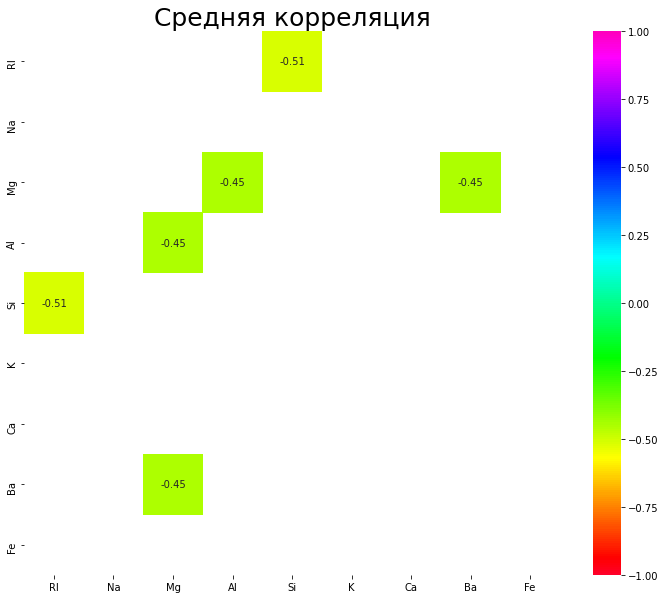

In [93]:
plt.figure (figsize=(12,10))
ax = sns.heatmap (corr[(corr<=0.75)&(corr>=0.45)|(corr<=-0.45)&(corr>=-0.75)], annot=True, vmax=1, vmin=-1, cmap='gist_rainbow')
ax.set_title('Средняя корреляция', fontsize=25)
plt.show

<function matplotlib.pyplot.show>

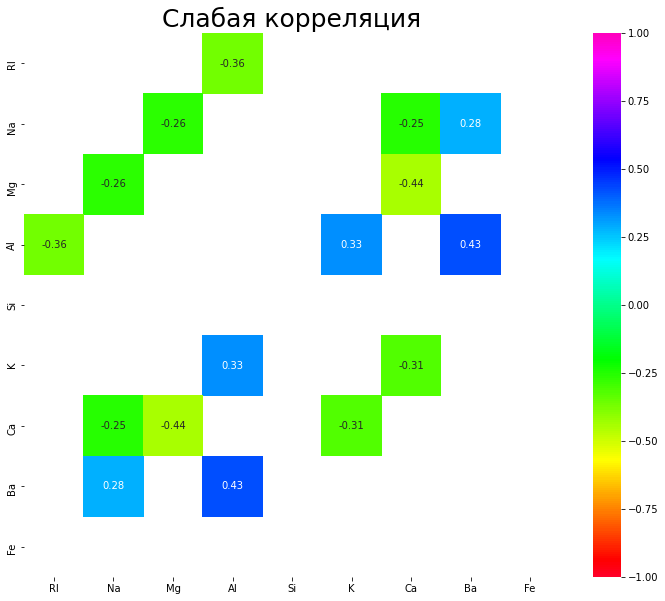

In [94]:
plt.figure (figsize=(12,10))
ax = sns.heatmap (corr[(corr<=0.45)&(corr>=0.25)|(corr<=-0.25)&(corr>=-0.45)], annot=True, vmax=1, vmin=-1, cmap='gist_rainbow')
ax.set_title('Слабая корреляция', fontsize=25)
plt.show